<a href="https://colab.research.google.com/github/YoshiyukiNakayama/github-slideshow/blob/main/graduation_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/My Drive/cardio_train.csv', sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:
print(f"Number of columns: { df.shape[1] }")

Number of columns: 13


In [ ]:
print(f"Number of rows: { df.shape[0] }")

Number of rows: 70000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df['age'] = round(df['age']/365.25,2)
df.insert(3, "female", (df['gender']==1).astype(int))
df.insert(4, 'male', (df['gender']==2).astype(int))
df.drop(['gender', 'id'], axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

75

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.insert(5, 'bmi', round((df['weight']/(df['height']/100)**2), 2))
df.describe()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000
mean,53.302892,0.650268,0.349732,164.358699,74.215407,27.560388,128.826314,96.648538,1.367222,1.226671,0.088223,0.053829,0.803661,0.499979
std,6.755908,0.476889,0.476889,8.213453,14.399663,6.093355,154.093668,188.572745,0.680480,0.572490,0.283621,0.225682,0.397231,0.500004
min,29.560000,0.000000,0.000000,55.000000,10.000000,3.470000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.360000,0.000000,0.000000,159.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.940000,1.000000,0.000000,165.000000,72.000000,26.400000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.390000,1.000000,1.000000,170.000000,82.000000,30.230000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.920000,1.000000,1.000000,250.000000,200.000000,298.670000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.drop(df.query('bmi >60 or bmi <15').index, axis=0, inplace=True)

In [ ]:
def BPStage(x,y):
  if x<=120 and y<=80:
    return 'normal'
  elif x<=129 and y<=80:
    return 'elevated'
  elif x<=139 or y<=89:
    return 'high 1'
  elif x<=180 or y<=120:
    return 'high 2'
  elif x>180 or y>120:
    return 'high 3'
  else:
    return None

df.insert(8, "bp_st", df.apply(lambda row: BPStage(row['ap_hi'], row['ap_lo']), axis=1))
df['bp_st'].value_counts()

normal      38937
high 1      15378
high 2      15021
elevated      419
high 3         77
Name: bp_st, dtype: int64

In [ ]:
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [ ]:
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_st,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


In [ ]:
base_color = sb.color_palette()[0]
def gender(x,y):
  if x==1:
    return 'female'
  else:
    return 'male'

''

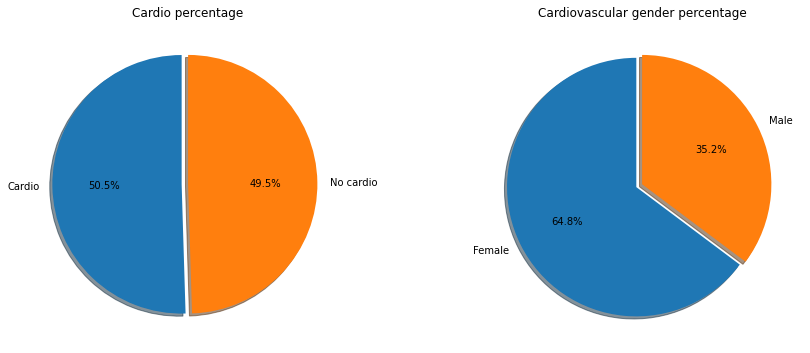

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=df['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = df.query("cardio == 1").apply(lambda row: gender(row['female'], row['male']), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular gender percentage')
;

''

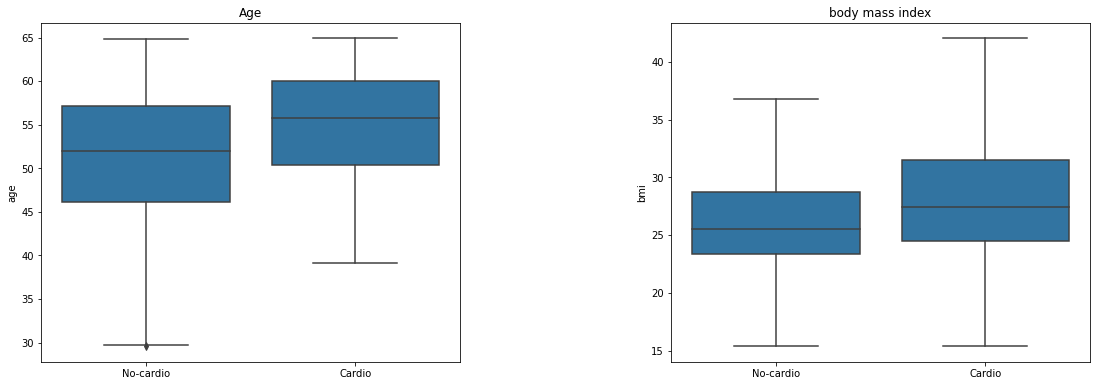

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sb.boxplot(data=df, x='cardio', y='age', ax=ax[0], color=base_color)
sb.boxplot(data=df, x='cardio', y='bmi', showfliers=False, ax=ax[1], color=base_color)
ax[0].title.set_text('Age')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('body mass index')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")
;

''

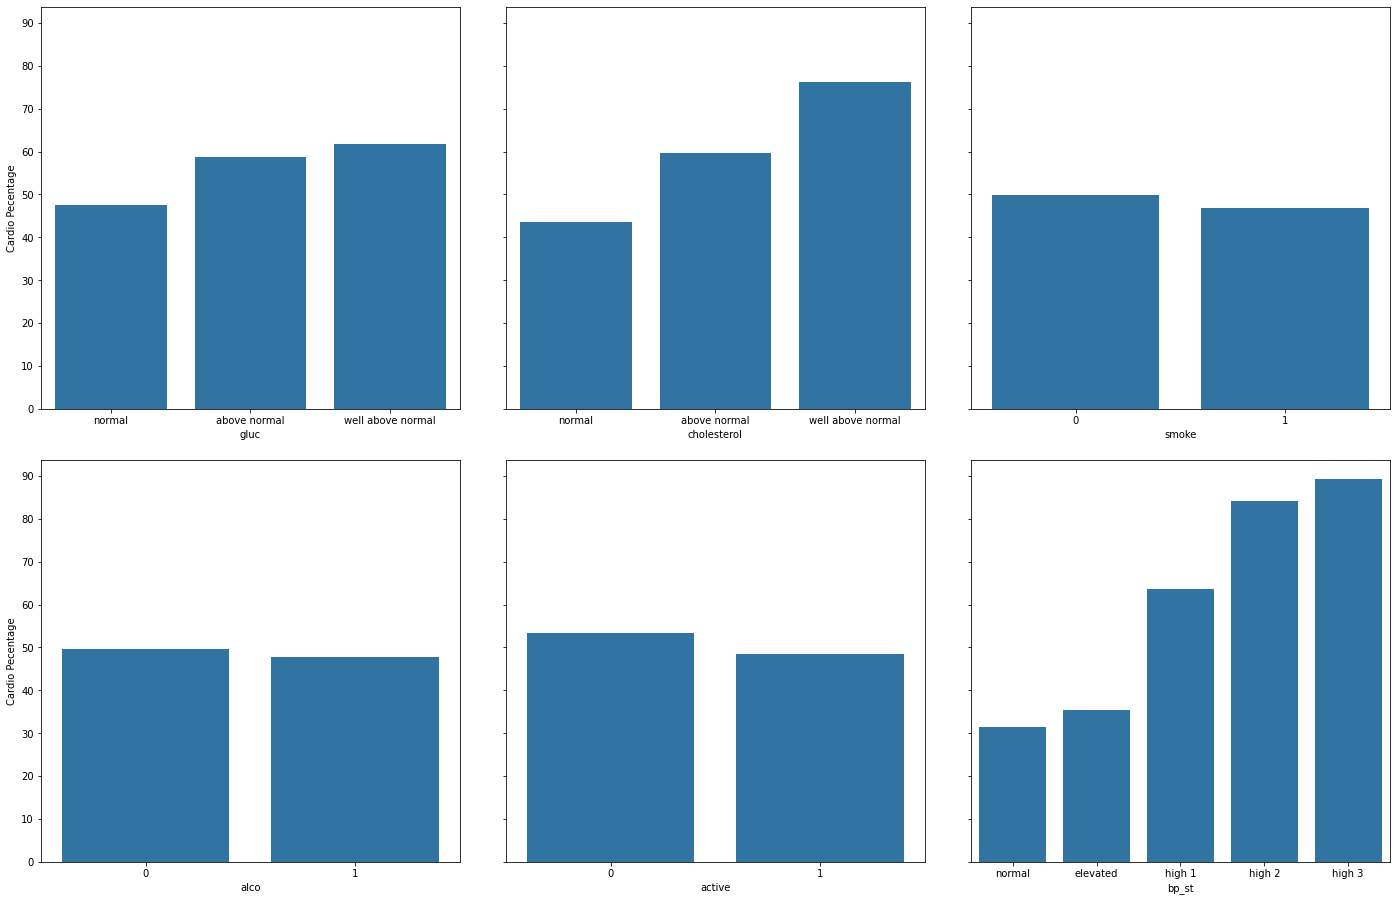

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,13), sharey=True)
plt.tight_layout(pad=3)


df_gluc = df.groupby('gluc').mean()
sb.barplot(data=df_gluc, x=df_gluc.index, y='cardio', ax=ax[0][0], color=base_color)
ax[0][0].set_xticklabels(['normal', 'above normal', 'well above normal'])
ax[0][0].set_yticks(np.arange(0, 1.2, 0.1))
ax[0][0].set_yticklabels(np.arange(0, 120, 10))

df_cholesterol = df.groupby('cholesterol').mean()
sb.barplot(data=df_cholesterol, x=df_cholesterol.index, y='cardio', ax=ax[0][1], color=base_color)
ax[0][1].set_xticklabels(['normal', 'above normal', 'well above normal'])

df_smoke = df.groupby('smoke').mean()
sb.barplot(data=df_smoke, x=df_smoke.index, y='cardio', ax=ax[0][2], color=base_color)

df_alco = df.groupby('alco').mean()
sb.barplot(data=df_alco, x=df_alco.index, y='cardio', ax=ax[1][0], color=base_color)

df_active = df.groupby('active').mean()
sb.barplot(data=df_active, x=df_active.index, y='cardio', ax=ax[1][1], color=base_color)

df_bp = df.groupby('bp_st').mean()
sb.barplot(data=df_bp, x=df_bp.index, y='cardio', ax=ax[1][2], color=base_color,
           order=['normal', 'elevated', 'high 1', 'high 2', 'high 3'])
plt.setp(ax[:, :], ylabel='')
plt.setp(ax[:, 0], ylabel='Cardio Pecentage')
;

In [ ]:
df_age_50 = df.query('age >=50')
df_agy_50_cardio = df_age_50.query('cardio==1')
round(df_agy_50_cardio.shape[0]*100/df_age_50.shape[0],2)

55.46

In [ ]:
df_bmi37 = df.query('bmi >=25')
df_bmi37_cardio = df_bmi37.query('cardio ==1')
round(df_bmi37_cardio.shape[0]*100/df_bmi37.shape[0],2)

55.59

In [ ]:
df_high3 = df.query("bp_st == 'high 3'")
df_high_cardio = df_high3.query('cardio == 1')
round(df_high_cardio.shape[0]*100/df_high3.shape[0],2)

89.29

In [ ]:
df_cohol_smoke = df.query("alco==1 or smoke==1")
print(df_cohol_smoke.shape[0]*100/df.shape[0])

11.53756450249264


In [ ]:
df_cohol_smoke_cardio = df_cohol_smoke.query('cardio == 1')
df_cohol_smoke_cardio.shape[0]*100/df_cohol_smoke.shape[0]

47.95957043588124

In [ ]:
df_not_active = df.query('active==0')
df_not_active_cardio = df_not_active.query('cardio==1')
df_not_active_cardio.shape[0]*100/df_not_active.shape[0]

53.28196769891836

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve
import warnings
warnings.filterwarnings('ignore')
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_st,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


In [ ]:
X = df.drop(['cardio', 'bp_st'], axis=1)
y = df['cardio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
m9 = LinearRegression().fit(X, y)
r2_score(m9.predict(X), y)

-2.380601423794895

In [ ]:
grid_search = {'bootstrap': [True], 'max_depth': [10], 'max_features': ['sqrt'], 'min_samples_leaf': [1], 
        'min_samples_split': [2], 'n_estimators': [55,51]}
gs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=grid_search, n_iter=100,
                          cv = 5, verbose=0, random_state=0, n_jobs = -1)

In [ ]:
gs.fit(X_train, y_train)
;

''

In [ ]:
print(gs.best_params_)

{'n_estimators': 51, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [ ]:
random_model = RandomForestClassifier(n_estimators=51, max_depth=10, random_state=10)

random_model.fit(X_train, y_train)
print(f"Testing accuracy: {round(accuracy_score(random_model.predict(X_test), y_test),4)*100}%")

Testing accuracy: 73.04%


''

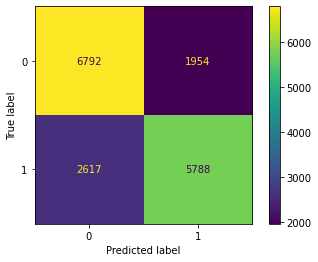

In [ ]:
plot_confusion_matrix(random_model, X_test, y_test, values_format='d')
;

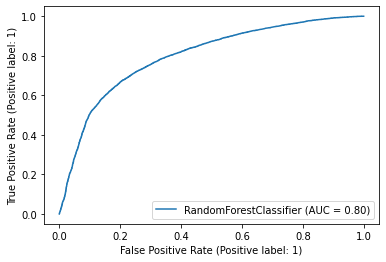

In [ ]:
plot_roc_curve(random_model, X_test, y_test)

In [ ]:
kparam = {'n_neighbors': [300], 'leaf_size': [50], 'weights': ['uniform'], 'algorithm': ['ball_tree']}
kgs = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=kparam, n_iter=100,
                         cv = 5, verbose = 3, random_state = 0, n_jobs = 7)
kgs.fit(X_train, y_train)
print(kgs.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'weights': 'uniform', 'n_neighbors': 300, 'leaf_size': 50, 'algorithm': 'ball_tree'}


In [ ]:
k_model = KNeighborsClassifier(weights = 'uniform',
                               n_neighbors = 300,
                               leaf_size = 50,
                               algorithm = 'auto')
k_model.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=50, n_neighbors=300)

In [ ]:
cross_validate(k_model, X, y, cv=5)['test_score'].mean()

0.7223550098665557

score: 71.95%


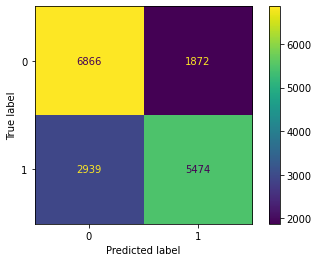

In [ ]:
k_pred = k_model.predict(X_test)
print(f"score: {round((accuracy_score(k_pred, y_test)*100), 2)}%")
plot_confusion_matrix(k_model, X_test, y_test, values_format='d')

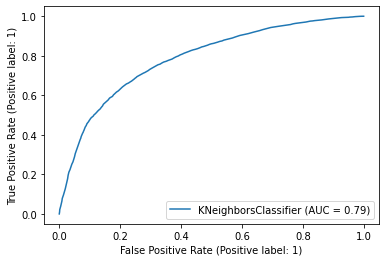

In [ ]:
plot_roc_curve(k_model, X_test, y_test)

In [ ]:
svcparam = {'C': [1,150], 'gamma': [0.00001, 0.000001], 'kernel': ['rbf']}
svcgs = GridSearchCV(SVC(), svcparam, refit = True, verbose = 0)
svcgs.fit(X_train, y_train)
print(svcgs.best_params_)

{'C': 150, 'gamma': 1e-05, 'kernel': 'rbf'}


In [ ]:
svc_model = SVC(C=150, gamma=0.00001, kernel="rbf", random_state=42)
svc_model.fit(X_train, y_train)

SVC(C=150, gamma=1e-05, random_state=42)

In [ ]:
cross_validate(svc_model,X, y, cv=5)['test_score'].mean()

0.7293080980973813

score: 72.88%


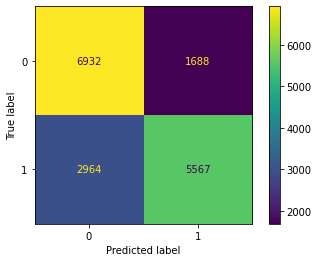

In [ ]:
svc_pred = svc_model.predict(X_test)
print(f"score: {round((accuracy_score(svc_pred, y_test)*100), 2)}%")
plot_confusion_matrix(svc_model, X_test, y_test, values_format='d')

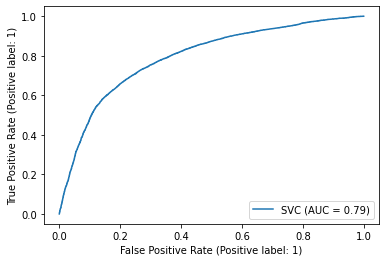

In [ ]:
plot_roc_curve(svc_model, X_test, y_test)

Cardiovascular Disease(心血管疾患)は人口の約50％が患う。
そのうち、女性が35.2%、男性が64.8%患う。
年配の方はかかりやすい。
BMIが高い方(中央値約27)はかかりやすい。
基準値以上のグルコースを持つ方の60%がかかる。
コレステロールも同様
喫煙・飲酒は因果関係なし
活発に動く人・動かない人で差がみられる。
血圧がhigh1(130-139)(血圧ごとに5段階に分けられるうちの３段階目)以上がかかりやすい。